<a href="https://colab.research.google.com/github/Shabnam-D/OIBSIP/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the **Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))


**Explore and Understand the Data**

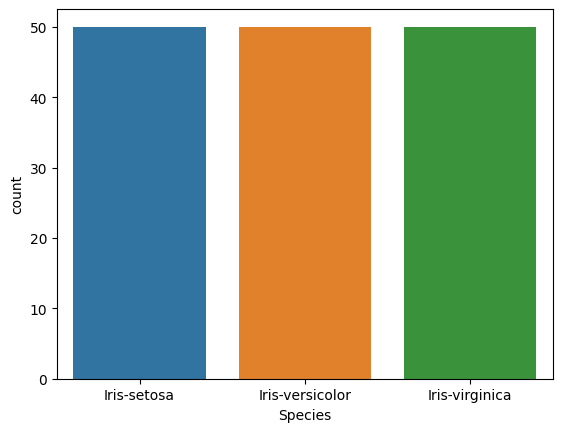

In [ ]:
# Display the first few rows of the dataset
df.head()
# Explore basic statistics
df.describe()
# Check for missing values
df.isnull().sum()
# Visualize the target variable distribution
sns.countplot(x='Species', data=df)
plt.show()

 **Data Preprocessing**

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Build and Train the Model**

In [ ]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

**Make Predictions**

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)


**Evaluate the Model**

Accuracy: 1.00


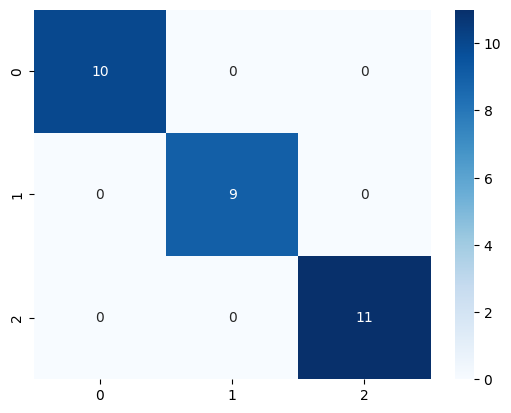

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# Display the classification report
print(classification_report(y_test, y_pred))

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Make Predictions for Data from the Dataset**

In [ ]:
# Load the new data from the CSV file
new_data_df = pd.read_csv('/content/gdrive/My Drive/Iris.csv')

# Display the new data
print("New Data:")
print(new_data_df)

# Extract features from the new data
new_features = new_data_df.drop('Species', axis=1)

# Standardize the new data using the same scaler used for training
new_features_scaled = scaler.transform(new_features)

# Make predictions for the new data
new_predictions = clf.predict(new_features_scaled)

# Add the predictions to the new data DataFrame
new_data_df['predicted_species'] = new_predictions

# Display the predicted species for the new data
print("\nPredicted Species:")
print(new_data_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm', 'predicted_species']])

New Data:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              .

In [ ]:
# Assuming you have a trained RandomForestClassifier named 'clf' and a fitted StandardScaler named 'scaler'
x_new = np.array([[5, 2.9, 1, 0.2]])

# Check the number of features the scaler was fitted with
num_features_expected = scaler.n_features_in_

# Ensure the number of features in x_new matches the number expected by the scaler
if x_new.shape[1] == num_features_expected:
    # Standardize the new data using the scaler parameters from training
    x_new_scaled = scaler.transform(x_new)

    # Make predictions for the new data
    prediction = clf.predict(x_new_scaled)

    # Display the predicted species
    print("Prediction: {}".format(prediction))
else:
    print("Number of features in x_new does not match the number expected by the scaler.")



Number of features in x_new does not match the number expected by the scaler. Printing if statement.
